# 1. Define binning and model

In [8]:
import glob
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from tqdm.notebook import tqdm
import pyhf
import cabinetry
import json
import yaml
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

In [9]:
cabinetry.set_logging()

In [4]:
# Define the range and number of bins, 'B0_CMS3_weMissM2'
start = -1.1
end = 8.6
num_bins = 50

# Create the bin edges
bins = np.linspace(start, end, num_bins + 1)

# Check for empty bins
# empty_bins = [41, 42, 43, 44, 46, 47, 48, 49]

# Merge adjacent empty bins
# merged_bins = np.delete(bins, empty_bins)

In [3]:
# define cabinetry configuration
config = {
   "General":{
      "Measurement": "R_D_MissM2",
      "POI": '$D\\tau\\nu$',              # parameter of interest, which we want to measure 
      "InputPath": "../Samples/Signal_MC14ri/{SamplePath}",       # where to find input data
      "HistogramFolder": "histograms/"

   }
}

config.update({
   "Regions":[
      {
         "Name": "signal_region",
         "Filter": '__weight__>0',                # event selection 
         "Variable": "B0_CMS3_weMissM2",  # which variable we bin histograms in
         "Binning": list(bins)
      }
   ]
})

config.update({
   "Samples":[
      {
         "Name": "Data",
         "Tree": "test",
         "SamplePath": ['MC14ri_sigDDst_foldex_e_7/D_tau_nu.root',
                        'MC14ri_sigDDst_foldex_e_7/Dst_tau_nu.root',
                        'MC14ri_normDDst_foldex_e_7/D_ell_nu.root',
                        'MC14ri_normDDst_foldex_e_7/Dst_ell_nu.root',
                        'MC14ri_normDDst_foldex_e_7/Dstst_ell_nu.root',
                        'MC14ri_Dststell2_foldex_e_7/Dstst_ell_nu.root',
                        'MC14ri_DststTau1_foldex_e_7/Dstst_tau_nu.root',
                        'MC14ri_DststTau2_foldex_e_7/Dstst_tau_nu.root',],
         "Data": True                       # observed data is handled differently, need to distinguish
      },
      {
         "Name": r'$D\tau\nu$',
         "Tree": "template",
         "SamplePath": ['MC14ri_sigDDst_foldex_e_7/D_tau_nu.root'],
         "Weight": '1'                 # weights: Monte Carlo integration, simulation correction etc.
      },
      {
         "Name": r'$D^\ast\tau\nu$',
         "Tree": "template",
         "SamplePath": ['MC14ri_sigDDst_foldex_e_7/Dst_tau_nu.root'],
         "Weight": '1'
      },
       {
         "Name": r'$D^{\ast\ast}\tau\nu$',
         "Tree": "template",
         #"Filter": "",
         "SamplePath": ['MC14ri_DststTau1_foldex_e_7/Dstst_tau_nu.root',
                        'MC14ri_DststTau2_foldex_e_7/Dstst_tau_nu.root'],
         "Weight": "1"                 # weights: Monte Carlo integration, simulation correction etc.
      },
       {
         "Name": r'$D\ell\nu$',
         "Tree": "template",
         "SamplePath": ['MC14ri_normDDst_foldex_e_7/D_ell_nu.root'],
         "Weight": '1'                 # weights: Monte Carlo integration, simulation correction etc.
      },
      {
         "Name": r'$D^\ast\ell\nu$',
         "Tree": "template",
         "SamplePath": ['MC14ri_normDDst_foldex_e_7/Dst_ell_nu.root'],
         "Weight": '1'
      },
       {
         "Name": r'$D^{\ast\ast}\ell\nu$',
         "Tree": "template",
         "SamplePath": ['MC14ri_normDDst_foldex_e_7/Dstst_ell_nu.root',
                        'MC14ri_Dststell2_foldex_e_7/Dstst_ell_nu.root'],
         "Weight": "1"                 # weights: Monte Carlo integration, simulation correction etc.
      }
   ]
})

config.update({"Systematics": []})

config.update({
   "NormFactors":[
      {
         "Name": '$D\\tau\\nu$',
         "Samples": r'$D\tau\nu$',    # we want this parameter to scale the signal
         "Nominal": 1,
         "Bounds": [0, 5]
      },
        {
         "Name": r'$D^\ast\tau\nu$',
         "Samples": r'$D^\ast\tau\nu$',
         "Nominal": 1,
         "Bounds": [0, 5]
      },
       {
         "Name": r'$D^{\ast\ast}\tau\nu$',
         "Samples": r'$D^{\ast\ast}\tau\nu$',
         "Nominal": 1,
         "Bounds": [0, 5]
      },
        {
         "Name": r'$D\ell\nu$',
         "Samples": r'$D\ell\nu$',
         "Nominal": 1,
         "Bounds": [0, 5]
      },
       {
         "Name": r'$D^\ast\ell\nu$',
         "Samples": r'$D^\ast\ell\nu$',
         "Nominal": 1,
         "Bounds": [0, 5]
      },
       {
         "Name": r'$D^{\ast\ast}\ell\nu$',
         "Samples": r'$D^{\ast\ast}\ell\nu$',
         "Nominal": 1,
         "Bounds": [0, 5]
      }
   ]
})


# config.update({
#    "Systematics":[
#       {
#          "Name": "Luminosity",
#          "Up": {"Normalization": 0.05},
#          "Down": {"Normalization": -0.05},
#          "Type": "Normalization"
#       },
#       {
#          "Name":"Modeling",
#          "Up": {"Tree": "B"},
#          "Down": {"Symmetrize": True},
#          "Samples": "signal",
#          "Type": "NormPlusShape"
#       },
#       {
#          "Name": "WeightBasedModeling",
#          "Up": {"Weight": "__weight__"},
#          "Down": {"Weight": "0.7*__weight__"},
#          "Samples": "qqbar",
#          "Type": "NormPlusShape"
#       }
#    ],
# })

In [4]:
cabinetry.configuration.validate(config)

True

In [5]:
cabinetry.configuration.print_overview(config)

INFO - cabinetry.configuration - the config contains:
INFO - cabinetry.configuration -   7 Sample(s)
INFO - cabinetry.configuration -   1 Regions(s)
INFO - cabinetry.configuration -   6 NormFactor(s)
INFO - cabinetry.configuration -   0 Systematic(s)


In [6]:
cabinetry.templates.build(config, method="uproot")

DEBUG - cabinetry.route -   in region signal_region
DEBUG - cabinetry.route -     reading sample Data
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/signal_region_Data.npz
DEBUG - cabinetry.route -     reading sample $D\tau\nu$
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/signal_region_$D\tau\nu$.npz
DEBUG - cabinetry.route -     reading sample $D^\ast\tau\nu$
DEBUG - cabinetry.route -       variation Nominal
WARNING - cabinetry.histo - signal_region_$D^\ast\tau\nu$ has empty bins: [1]
DEBUG - cabinetry.histo - saving histogram to histograms/signal_region_$D^\ast\tau\nu$.npz
DEBUG - cabinetry.route -     reading sample $D^{\ast\ast}\tau\nu$
DEBUG - cabinetry.route -       variation Nominal
WARNING - cabinetry.histo - signal_region_$D^{\ast\ast}\tau\nu$ has empty bins: [0]
DEBUG - cabinetry.histo - saving histogram to histograms/signal_region_$D^{\ast\ast}\tau\nu$.np

In [7]:
cabinetry.templates.postprocess(config)

DEBUG - cabinetry.route -   in region signal_region
DEBUG - cabinetry.route -     reading sample Data
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/signal_region_Data_modified.npz
DEBUG - cabinetry.route -     reading sample $D\tau\nu$
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/signal_region_$D\tau\nu$_modified.npz
DEBUG - cabinetry.route -     reading sample $D^\ast\tau\nu$
DEBUG - cabinetry.route -       variation Nominal
WARNING - cabinetry.histo - signal_region_$D^\ast\tau\nu$ has empty bins: [1]
DEBUG - cabinetry.histo - saving histogram to histograms/signal_region_$D^\ast\tau\nu$_modified.npz
DEBUG - cabinetry.route -     reading sample $D^{\ast\ast}\tau\nu$
DEBUG - cabinetry.route -       variation Nominal
WARNING - cabinetry.histo - signal_region_$D^{\ast\ast}\tau\nu$ has empty bins: [0]
DEBUG - cabinetry.histo - saving histogram to histograms/signal_regi

INFO - cabinetry.visualize - visualizing histogram
INFO - cabinetry.visualize.utils - saving figure as figures/signal_region_prefit.pdf


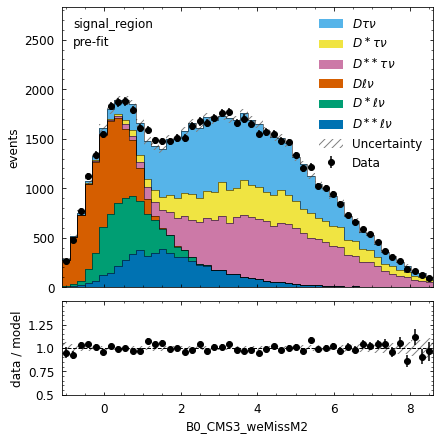

In [8]:
_ = cabinetry.visualize.data_mc_from_histograms(config)

# 2. Create a pyhf workspace

In [9]:
workspace_path = "R_D_MissM2_workspace.json"
spec = cabinetry.workspace.build(config)
cabinetry.workspace.save(spec, workspace_path)

INFO - cabinetry.workspace - building workspace
DEBUG - cabinetry.workspace - adding NormFactor $D\tau\nu$ to sample $D\tau\nu$ in region signal_region
DEBUG - cabinetry.workspace - adding NormFactor $D^\ast\tau\nu$ to sample $D^\ast\tau\nu$ in region signal_region
DEBUG - cabinetry.workspace - adding NormFactor $D^{\ast\ast}\tau\nu$ to sample $D^{\ast\ast}\tau\nu$ in region signal_region
DEBUG - cabinetry.workspace - adding NormFactor $D\ell\nu$ to sample $D\ell\nu$ in region signal_region
DEBUG - cabinetry.workspace - adding NormFactor $D^\ast\ell\nu$ to sample $D^\ast\ell\nu$ in region signal_region
DEBUG - cabinetry.workspace - adding NormFactor $D^{\ast\ast}\ell\nu$ to sample $D^{\ast\ast}\ell\nu$ in region signal_region
INFO - pyhf.workspace - Validating spec against schema: workspace.json
DEBUG - cabinetry.workspace - saving workspace to R_D_MissM2_workspace.json


In [10]:
workspace_path = "R_D_MissM2_workspace.json"
spec = cabinetry.workspace.load(workspace_path)

In [6]:
print(json.dumps(spec, sort_keys=True, indent=4))

{
    "channels": [
        {
            "name": "signal_region",
            "samples": [
                {
                    "data": [
                        5.0,
                        4.0,
                        18.0,
                        30.0,
                        40.0,
                        55.0,
                        93.0,
                        142.0,
                        198.0,
                        262.0,
                        323.0,
                        381.0,
                        445.0,
                        479.0,
                        559.0,
                        601.0,
                        630.0,
                        717.0,
                        702.0,
                        750.0,
                        723.0,
                        672.0,
                        723.0,
                        688.0,
                        672.0,
                        656.0,
                        630.0,
                        617.0,
 

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier staterror_signal_region (50 new nuisance parameters)
INFO - cabinetry.visualize.utils - saving figure as figures/modifier_grid.pdf


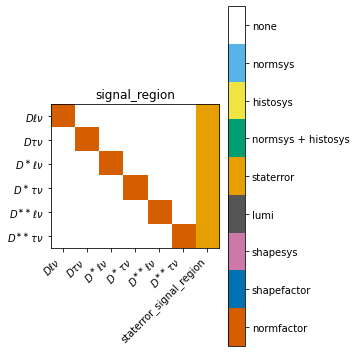

In [7]:
cabinetry.visualize.modifier_grid(pyhf.Workspace(spec).model())

In [11]:
model, data = cabinetry.model_utils.model_and_data(spec)

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier staterror_signal_region (50 new nuisance parameters)


In [3]:
model, data = cabinetry.model_utils.model_and_data(spec)

# 3. MLE

In [4]:
pyhf.get_backend()

(<pyhf.tensor.numpy_backend.numpy_backend at 0x7fc8827ddec0>,
 <pyhf.optimize.scipy_optimizer at 0x7fc8827d0ea0>)

In [8]:
%%time
pyhf.set_backend("numpy", 'minuit')
fit_results = cabinetry.fit.fit(model=model, data=data, minos=model.config.parameters[:6])

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 220.4                      │             Nfcn = 5883              │
│ EDM = 1.98e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

CPU times: user 2.16 s, sys: 26.7 ms, total: 2.18 s
Wall time: 2.17 s


In [15]:
%%time
pyhf.set_backend("jax", pyhf.optimize.minuit_optimizer(maxiter=1000000))
fit_results = cabinetry.fit.fit(model=model, data=data, minos=model.config.parameters[:6])

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 220.4                      │       Nfcn = 1984, Ngrad = 19        │
│ EDM = 1.92e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

FitResults(bestfit=array([0.98558988, 0.93210057, 1.0077116 , 1.25395451, 1.05931523,
       0.9232408 , 0.98079835, 0.96881319, 1.0201818 , 1.02420555,
       1.00923421, 0.98183871, 1.01043855, 0.99444442, 0.9963147 ,
       0.98082249, 0.98021855, 1.03640347, 1.01666499, 1.02421888,
       0.98961058, 0.99841437, 0.97428016, 0.98895998, 1.02189757,
       0.98484119, 1.00840126, 1.00519441, 1.01884356, 0.99148015,
       0.98474631, 0.98998514, 0.97173798, 1.00035208, 1.01094512,
       0.98732546, 1.00254694, 1.00912692, 0.98603718, 1.04029116,
       0.9948862 , 1.00332502, 1.01127091, 0.98530941, 1.00850754,
       0.99079538, 1.02161842, 1.00845007, 1.0212303 , 1.02698824,
       0.97432753, 1.01955146, 0.9277637 , 1.04632801, 0.94476491,
       0.98878714]), uncertainty=array([0.03200603, 0.14911605, 0.09795746, 0.48270724, 0.21470001,
       0.22697745, 0.04481271, 0.03438625, 0.02932781, 0.02374253,
       0.02089053, 0.01899192, 0.01850977, 0.01778666, 0.01752597,
       0.0

In [12]:
%%time
pyhf.set_backend('jax','scipy')
parameters = pyhf.infer.mle.fit(data=data, pdf=model)
pyhf.set_backend('jax','minuit')
fit_result2 = cabinetry.fit.fit(model=model, data=data, minos=model.config.parameters[:6], init_pars=parameters.tolist())

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 220.4                      │        Nfcn = 1906, Ngrad = 1        │
│ EDM = 3.12e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

CPU times: user 1.4 s, sys: 27.1 ms, total: 1.42 s
Wall time: 1.38 s


In [ ]:
for label, result, unc in zip(fit_results.labels, fit_results.bestfit, fit_results.uncertainty):
    print(f"{label}: {result:.3f} +/- {unc:.3f}")

INFO - cabinetry.visualize.utils - saving figure as figures/pulls.pdf


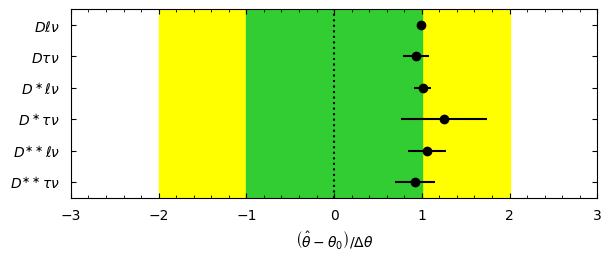

In [13]:
cabinetry.visualize.pulls(fit_results)

INFO - cabinetry.visualize.utils - saving figure as figures/correlation_matrix.pdf


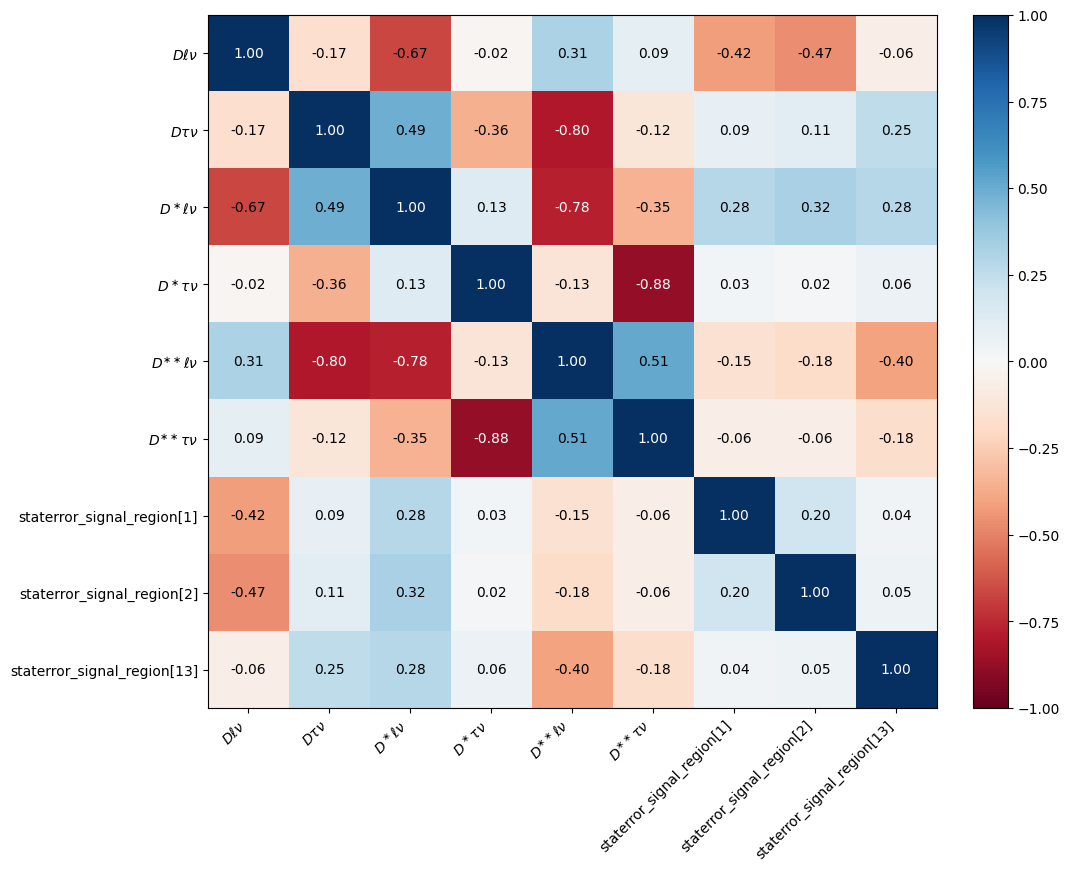

In [14]:
cabinetry.visualize.correlation_matrix(fit_results, pruning_threshold=0.4)

DEBUG - cabinetry.model_utils - total stdev is [[12.4, 17.4, 22, 25.6, 27.5, 30.3, ..., 12.9, 11.7, 10.5, 9.48, 8.65, 7.06]]
DEBUG - cabinetry.model_utils - total stdev per channel is [242]
INFO - cabinetry.visualize.utils - saving figure as figures/signal_region_postfit.pdf


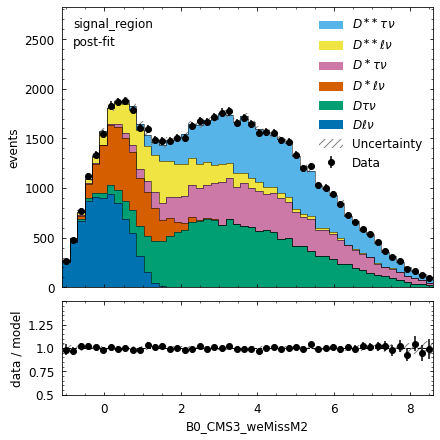

In [297]:
model_pred_postfit = cabinetry.model_utils.prediction(model, fit_results=fit_results)
_ = cabinetry.visualize.data_mc(model_pred_postfit, data, config=config)

# 4. Asimov and Toys

In [ ]:
asimov_data = cabinetry.model_utils.asimov_data(model)
_ = cabinetry.fit.fit(model, asimov_data)

In [4]:
pyhf.set_backend("jax", pyhf.optimize.minuit_optimizer(maxiter=1000000))

poi = model.config.parameters[:6]

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [4]:
pyhf.set_backend("numpy", 'minuit')

# init the norm parameters
par_bounds = model.config.suggested_bounds()
fixed_params = model.config.suggested_fixed()
poi = model.config.parameters[:6] # same as model.config.par_order

In [5]:
from multiprocessing import Pool

def fit_toys(toy):
    try:
        return cabinetry.fit.fit(model=model, data=toy)
        # return pyhf.infer.mle.fit(toy, model,return_uncertainties=True)
    except: #pyhf.exceptions.FailedMinimization:
        pass

def generate_toys(init_norm=None, n_toys=100, poi=poi,seed=0):
    # initialize the generator and model
    toy_pars = model.config.suggested_init()
    rng = np.random.default_rng(seed)
    toy_pars[:len(poi)] = rng.random(len(poi))
    if type(init_norm) in [int, float]:
        toy_pars[:len(poi)] = [init_norm]*len(poi)
    # print(f"init parameters: {list(zip(model.config.parameters, [round(n,2) for n in toy_pars]))}")

    # make the pdfs
    pdf_toy = model.make_pdf(pyhf.tensorlib.astensor(toy_pars))

    # draws samples from the pdf shape given the number of samples N=(10000,)
    return pdf_toy.sample((n_toys,)), toy_pars

def pull_plot(init_norm=None, n_toys=100, poi=poi):
    # create toys
    toys, toy_pars = generate_toys(init_norm=init_norm, n_toys=n_toys)
    
    # fit toys
    with Pool(None, maxtasksperchild=1) as p:
        fit_results = list(tqdm(p.imap(fit_toys, toys), total=len(toys),desc =f"Fitting toys"))
    
    bestfit = np.array([f.bestfit for f in fit_results if f!=None])
    errors = np.array([f.uncertainty for f in fit_results if f!=None])
    
    # calculate pulls
    pulls = np.array(
        [
                (bestfit[:,model.config.par_slice(k)] - toy_pars[model.config.par_slice(k)])
                / errors[:,model.config.par_slice(k)]
            for k in model.config.par_order[:len(poi)]
        ]
    )
    
    # plot pulls
    bins = np.linspace(-5,5,50)
    fig = plt.figure(figsize=[16,10])
    for i in range(len(poi)):
        ax = fig.add_subplot(2,3,i+1)
        ax.hist(pulls[i], bins=bins)
        ax.set_title(model.config.parameters[i],fontsize=14)
        ax.axvline(0, label="expected", color="black", linestyle="dashed")
        ax.axvline(np.mean(pulls[i]), label="empirical mean", color="red", linestyle="dashed")
        ax.legend(title=f'$\sigma$ = {np.std(pulls[i]):.2f}')
        ax.grid()
               
    fig.suptitle(f'{len(bestfit)} successful toy fits pull plot',fontsize=16)
    fig.supylabel('# of toys per bin',x=0.06,fontsize=16)
    fig.supxlabel(r'Pulls = $(\mu - \hat{\mu})\,/ \delta \mu$', y=0.06,fontsize=16)
    
def linearity_plot(n_tests, n_toys, poi=poi):
    truth_all = np.empty((n_tests, len(poi)))
    fitted_all = np.empty((n_tests, len(poi)))
    errors_all = np.empty((n_tests, len(poi)))
    for i in range(n_tests):
        # initialize toys
        toys, toy_pars = generate_toys(n_toys=n_toys, seed=i)
        
        # fit toys
        with Pool(None, maxtasksperchild=10) as p:
            fit_results = list(tqdm(p.imap(fit_toys, toys), total=len(toys),desc =f"Fitting toys"))

        bestfit = np.array([f.bestfit for f in fit_results if f!=None])
        
        # save fitted parameters
        mean = np.mean(bestfit[:,:len(poi)], axis=1)
        std = np.std(bestfit[:,:len(poi)], axis=1)
        
        truth_all[i] = toy_pars[:len(poi)]
        fitted_all[i] = mean
        errors_all[i] = std
        
    # plot linearity
    bins = np.linspace(0,1,10)
    fig = plt.figure(figsize=[16,10])
    for i in range(len(poi)):
        ax = fig.add_subplot(2,3,i+1)
        ax.errorbar(x=truth_all[:,i], y=fitted_all[:,i], yerr=errors_all[:,i], fmt='ko')
        ax.plot(bins,bins,label="expected", color="red", linestyle="dashed")
        ax.set_title(model.config.parameters[i],fontsize=14)
        ax.legend()
        ax.grid()

    fig.suptitle(f'{n_tests} Test points with {n_toys} toys for each point',fontsize=16)
    fig.supylabel('Fitted',x=0.06,fontsize=16)
    fig.supxlabel('Truth', y=0.06,fontsize=16)

In [7]:
pull_plot(init_norm=1, n_toys=100000)

Fitting toys:   0%|          | 0/100000 [00:00<?, ?it/s]

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00633187
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0056215
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00468224
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00531592
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00669594
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0041675
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0256415
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00478272
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00709443
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00641272
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00765017
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00441515
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00552653
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0057798
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search lin

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00776918
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0075465
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00945305
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0044552
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00645253
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00498514
W MnPosDef Matrix forced pos-def by adding to diagonal 0.011012
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00432801
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0263183
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W VariableMetricBuilder Matrix not pos.def, gdel = 0.000327393 > 0
W MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -1.64988e-06
W MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -4.18429
W MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -0.000633853
W MnPosDef Added to 

W MnPosDef non-positive diagonal element in covariance matrix[ 38 ] = -2.43225e-05

W MnPosDef non-positive diagonal element in covariance matrix[ 40 ] = -6.12379e-05W MnPosDef non-positive diagonal element in covariance matrix[ 48 ] = -0.000640166
W MnPosDef non-positive diagonal element in covariance matrix[ 49 ] = -4.55127e-05
W MnPosDef non-positive diagonal element in covariance matrix[ 50 ] = -6.99453e-06
W MnPosDef non-positive diagonal element in covariance matrix[ 51 ] = -5.60947e-05
W MnPosDef non-positive diagonal element in covariance matrix[ 53 ] = -0.000269717
W MnPosDef non-positive diagonal element in covariance matrix[ 54 ] = -0.000472649
W MnPosDef non-positive diagonal element in covariance matrix[ 55 ] = -0.00103675
W MnPosDef Added to diagonal of Error matrix a value 5.61638
W VariableMetricBuilder gdel = -8107.26
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00856121
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0212924
W MnPosDef Matrix forc

W MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -3.08533W MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -0.0121493
W MnPosDef Added to diagonal of Error matrix a value 3.58533
W VariableMetricBuilder gdel = -5.27818
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0111402
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00422612
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00487573
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00561673
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00511632
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00428473
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00590692
W MnPosDef Matrix forced pos-def by adding to diagonal 0.030752
W MnPosDef Matrix forced pos-def by adding to diagonal 0.02581
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00508205
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00602175
W MnPosDef Matrix forc

W MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -0.0040774
W MnPosDef Added to diagonal of Error matrix a value 12.0504
W VariableMetricBuilder gdel = -2.63404
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00646553
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00455595
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00427737
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00498489
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00709908
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0143254
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00652953
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00517411
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0114055
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00629461
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0296429
W MnPosDef Matrix forced pos-def by adding to diagonal 0.026837
W MnPosDef Matrix forced pos-def

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0298826
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00668908
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0047014
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0210112
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0055542
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00499536
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0561531
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00457588
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00592232
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0065671
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0200901
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00744613
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00862955
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00426281
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00429228
W MnPosDef Matrix

  message: Optimization terminated successfully.
  success: False
      fun: 225.91665385644504
        x: <ValueView $D\ell\nu$=1.0044334278416716 $D\tau\nu$=1.2453142077370938 $D^\ast\ell\nu$=1.065929650264959 $D^\ast\tau\nu$=0.013485077863488888 $D^{\ast\ast}\ell\nu$=0.714512286350802 $D^{\ast\ast}\tau\nu$=1.3361012213230339 staterror_signal_region[0]=1.038579651416112 staterror_signal_region[1]=0.9995619288979205 staterror_signal_region[2]=1.0257260275683295 staterror_signal_region[3]=0.9892486493053161 staterror_signal_region[4]=0.9984771133202813 staterror_signal_region[5]=0.9764686736468322 staterror_signal_region[6]=0.987836760555447 staterror_signal_region[7]=1.0381350485242384 staterror_signal_region[8]=0.9925339974156594 staterror_signal_region[9]=1.0221937306843278 staterror_signal_region[10]=1.0426297404400628 staterror_signal_region[11]=1.0346510097670518 staterror_signal_region[12]=1.0050000663113632 staterror_signal_region[13]=1.0505693782567231 staterror_signal_region[

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00429609
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0219861
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00503702
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00536696
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00783981
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00786048
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -0.00476928W VariableMetricBuilder Matrix not pos.def, gdel = 0.291126 > 0

W MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -2.43273
W MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -0.00814399
W MnPosDef Added to diagonal of Error matrix a value 2.93273
W VariableMetricBuilder gdel = -11.9515
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00795114
W MnPosDef Matrix forced pos-def by adding to diagon

W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W VariableMetricBuilder Matrix not pos.def, gdel = 0.000314822 > 0
W MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -3.30139
W MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -0.000424487
W MnPosDef Added to diagonal of Error matrix a value 3.80139
W VariableMetricBuilder gdel = -1.25246
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0404741
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W VariableMetricBuilder Matrix not pos.def, gdel = 0.00015964 > 0
W MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -2.4443
W MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -0.000187948
W MnPosDef Added to diagonal of Error matrix a value 2.9443
W VariableMetricBuilder gdel = -1.22755
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0433862
W MnPosDef Matrix forced pos-def by adding to diagona

AttributeError: 'NoneType' object has no attribute 'bestfit'

Fitting toys:   0%|          | 0/5000 [00:00<?, ?it/s]

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00408307
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00447732
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00517123
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0321739
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00619232
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00435623
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00673753
W MnPosDef Matrix forced pos-def by adding to diagonal 0.028229
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00503503
W MnPosDef Matrix forced pos-def by adding to diagonal 0.040518
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00453649
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0127037
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0405524
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W VariableMetricBuilder Matrix not pos.def, gdel = 0.000204508 > 0


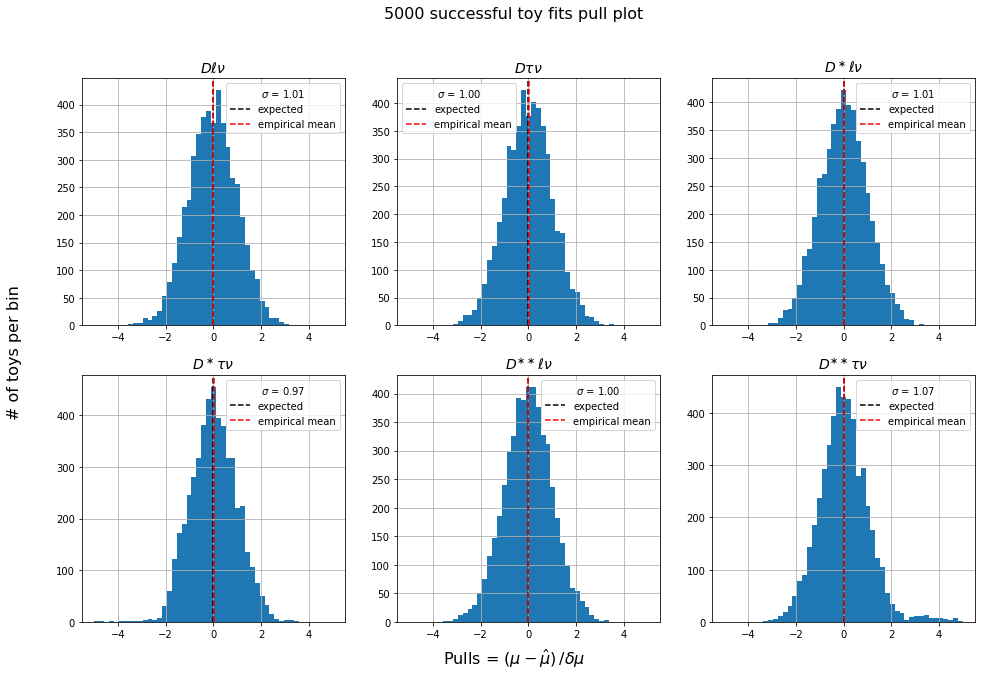

In [6]:
pull_plot(init_norm=1, n_toys=5000)

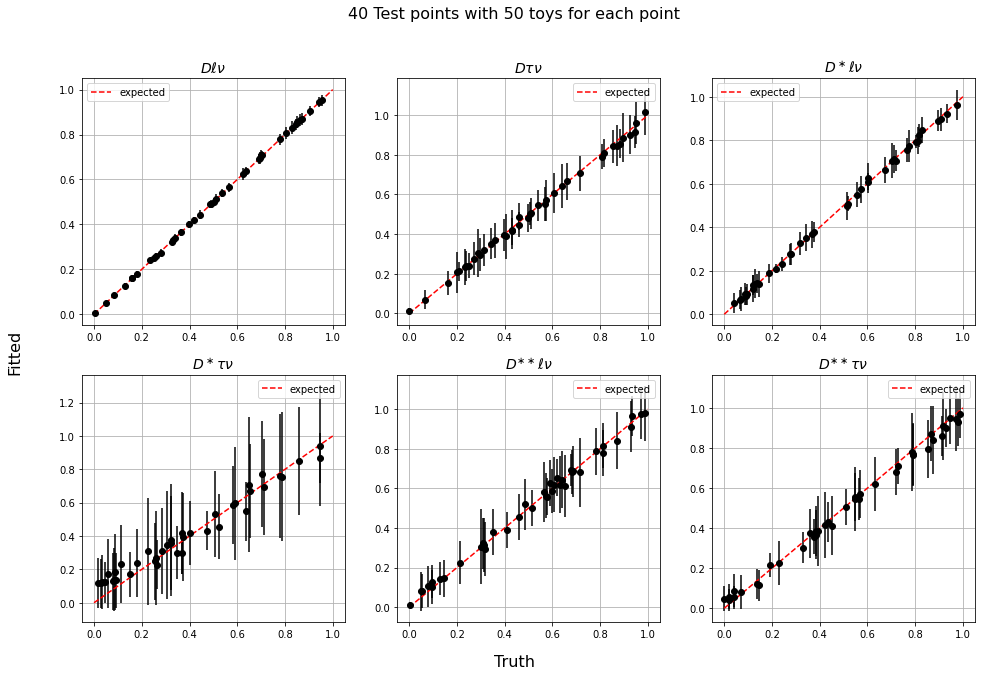

In [13]:
linearity_plot(n_tests=40, n_toys=50, poi=poi)